In [2]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers
import pprint
from pandasticsearch import Select

In [3]:
es = Elasticsearch(f'http://127.0.0.1:9200', request_timeout = 30, max_retries=10, retry_on_timeout=True)
pprint.pprint(es.info())

ObjectApiResponse({'name': 'node1', 'cluster_name': 'es-cluster', 'cluster_uuid': 'KRMpzGXsSwqOs3R4khKHsg', 'version': {'number': '8.6.2', 'build_flavor': 'default', 'build_type': 'zip', 'build_hash': '2d58d0f136141f03239816a4e360a8d17b6d8f29', 'build_date': '2023-02-13T09:35:20.314882762Z', 'build_snapshot': False, 'lucene_version': '9.4.2', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})


In [14]:
size=10000
def make_body(start, size=10000):
    body= {
        "track_total_hits" : True,
        "from": start,
        "size": start+size, 
        "_source": [
            "YNewsML.NewsContent.Title",
            "YNewsML.NewsContent.Body",
            "send_timestamp",
            "clean_body"
        ], 
        "sort" : {
            "send_timestamp" : "desc"
        },
        "query": {
            "bool":{
              "filter": [
                {
                 "match": {
                   "YNewsML.NewsContent.Body": "외교부와 유니세프"
                  }
                }
              ]
            }
        }
    }
    return body

In [15]:
total = es.search(body=make_body(start=0))['hits']['total']['value']

C:\Users\user\AppData\Local\Temp\ipykernel_13820\1819845519.py:1: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  total = es.search(body=make_body(start=0))['hits']['total']['value']


In [16]:
total

0

In [3]:
import pandas as pd 

In [4]:
df1 = pd.read_csv('key_word_timeline.csv')
df2 = pd.read_csv('key.csv')

In [5]:
df1

,day,전시회서 스마트공장,외교부와 유니세프,한류국제학술대회 서울,중국 중앙선전부장이,억원작년 동기,휴대전화 러시아,대표이사가 업무협약서를,한국동서발전 사업부사장과,레바논 대통령은,이탈리아 유격대원들에게,김형진씨 모친상
0,20,9.0,25.0,29.0,NaN,11.0,4,6.0,NaN,2.0,NaN,17.0
1,21,5.0,9.0,9.0,3.0,NaN,5,2.0,74.0,4.0,NaN,2.0
2,22,1.0,3.0,NaN,2.0,NaN,5,NaN,2.0,NaN,5.0,NaN
3,23,NaN,3.0,NaN,39.0,NaN,2,2.0,3.0,NaN,1.0,NaN
4,24,4.0,22.0,NaN,11.0,NaN,5,NaN,2.0,4.0,NaN,1.0
5,25,11.0,49.0,1.0,3.0,1.0,2,NaN,1.0,1.0,NaN,NaN
6,26,25.0,62.0,NaN,5.0,1.0,4,4.0,1.0,2.0,NaN,1.0
7,27,23.0,36.0,NaN,3.0,39.0,12,NaN,1.0,8.0,NaN,NaN
8,28,18.0,9.0,NaN,15.0,3.0,5,8.0,NaN,5.0,NaN,NaN
9,29,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN


In [6]:
df2

,day,러시아군의 공격을,여행 수요가,서울디지털재단,ETF,핼러윈,원전,억원작년 동기,김태종 특파원,대한민국시도의회,행정안전부 장관이,폭발,지진,국정원장,국회 정무위원장
0,20,1.0,NaN,NaN,2.0,NaN,11.0,11.0,1.0,1.0,17.0,4.0,2.0,NaN,1.0
1,21,3.0,NaN,NaN,2.0,NaN,11.0,11.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN
2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
3,23,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,NaN,1.0,NaN,1.0,NaN,6.0,6.0,4.0,NaN,6.0,1.0,1.0,NaN,NaN
5,25,NaN,NaN,NaN,3.0,NaN,11.0,11.0,2.0,NaN,3.0,2.0,1.0,NaN,NaN
6,26,1.0,NaN,NaN,NaN,NaN,7.0,7.0,2.0,NaN,2.0,1.0,4.0,26.0,NaN
7,27,NaN,1.0,NaN,5.0,NaN,10.0,10.0,1.0,NaN,NaN,3.0,1.0,21.0,1.0
8,28,NaN,NaN,NaN,2.0,NaN,4.0,4.0,2.0,NaN,6.0,2.0,NaN,2.0,NaN
9,29,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,5.0,NaN,67.0,NaN,NaN


In [7]:
df_concat = pd.merge(df1, df2, how="outer", on="day").sort_values('day')
df_concat

,day,전시회서 스마트공장,외교부와 유니세프,한류국제학술대회 서울,중국 중앙선전부장이,억원작년 동기_x,휴대전화 러시아,대표이사가 업무협약서를,한국동서발전 사업부사장과,레바논 대통령은,...,핼러윈,원전,억원작년 동기_y,김태종 특파원,대한민국시도의회,행정안전부 장관이,폭발,지진,국정원장,국회 정무위원장
0,20,9.0,25.0,29.0,NaN,11.0,4,6.0,NaN,2.0,...,NaN,11.0,11.0,1.0,1.0,17.0,4.0,2.0,NaN,1.0
1,21,5.0,9.0,9.0,3.0,NaN,5,2.0,74.0,4.0,...,NaN,11.0,11.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN
2,22,1.0,3.0,NaN,2.0,NaN,5,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
3,23,NaN,3.0,NaN,39.0,NaN,2,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,4.0,22.0,NaN,11.0,NaN,5,NaN,2.0,4.0,...,NaN,6.0,6.0,4.0,NaN,6.0,1.0,1.0,NaN,NaN
5,25,11.0,49.0,1.0,3.0,1.0,2,NaN,1.0,1.0,...,NaN,11.0,11.0,2.0,NaN,3.0,2.0,1.0,NaN,NaN
6,26,25.0,62.0,NaN,5.0,1.0,4,4.0,1.0,2.0,...,NaN,7.0,7.0,2.0,NaN,2.0,1.0,4.0,26.0,NaN
7,27,23.0,36.0,NaN,3.0,39.0,12,NaN,1.0,8.0,...,NaN,10.0,10.0,1.0,NaN,NaN,3.0,1.0,21.0,1.0
8,28,18.0,9.0,NaN,15.0,3.0,5,8.0,NaN,5.0,...,NaN,4.0,4.0,2.0,NaN,6.0,2.0,NaN,2.0,NaN
9,29,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,7.0,7.0,NaN,NaN,5.0,NaN,67.0,NaN,NaN


In [8]:
df_concat.drop(['억원작년 동기_x'], axis=1, inplace=True)

In [9]:
df_concat

,day,전시회서 스마트공장,외교부와 유니세프,한류국제학술대회 서울,중국 중앙선전부장이,휴대전화 러시아,대표이사가 업무협약서를,한국동서발전 사업부사장과,레바논 대통령은,이탈리아 유격대원들에게,...,핼러윈,원전,억원작년 동기_y,김태종 특파원,대한민국시도의회,행정안전부 장관이,폭발,지진,국정원장,국회 정무위원장
0,20,9.0,25.0,29.0,NaN,4,6.0,NaN,2.0,NaN,...,NaN,11.0,11.0,1.0,1.0,17.0,4.0,2.0,NaN,1.0
1,21,5.0,9.0,9.0,3.0,5,2.0,74.0,4.0,NaN,...,NaN,11.0,11.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN
2,22,1.0,3.0,NaN,2.0,5,NaN,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
3,23,NaN,3.0,NaN,39.0,2,2.0,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,4.0,22.0,NaN,11.0,5,NaN,2.0,4.0,NaN,...,NaN,6.0,6.0,4.0,NaN,6.0,1.0,1.0,NaN,NaN
5,25,11.0,49.0,1.0,3.0,2,NaN,1.0,1.0,NaN,...,NaN,11.0,11.0,2.0,NaN,3.0,2.0,1.0,NaN,NaN
6,26,25.0,62.0,NaN,5.0,4,4.0,1.0,2.0,NaN,...,NaN,7.0,7.0,2.0,NaN,2.0,1.0,4.0,26.0,NaN
7,27,23.0,36.0,NaN,3.0,12,NaN,1.0,8.0,NaN,...,NaN,10.0,10.0,1.0,NaN,NaN,3.0,1.0,21.0,1.0
8,28,18.0,9.0,NaN,15.0,5,8.0,NaN,5.0,NaN,...,NaN,4.0,4.0,2.0,NaN,6.0,2.0,NaN,2.0,NaN
9,29,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,7.0,7.0,NaN,NaN,5.0,NaN,67.0,NaN,NaN


In [13]:
df_concat.day = date
df_concat

,day,전시회서 스마트공장,외교부와 유니세프,한류국제학술대회 서울,중국 중앙선전부장이,휴대전화 러시아,대표이사가 업무협약서를,한국동서발전 사업부사장과,레바논 대통령은,이탈리아 유격대원들에게,...,핼러윈,원전,억원작년 동기_y,김태종 특파원,대한민국시도의회,행정안전부 장관이,폭발,지진,국정원장,국회 정무위원장
0,2022-10-20,9.0,25.0,29.0,NaN,4,6.0,NaN,2.0,NaN,...,NaN,11.0,11.0,1.0,1.0,17.0,4.0,2.0,NaN,1.0
1,2022-10-21,5.0,9.0,9.0,3.0,5,2.0,74.0,4.0,NaN,...,NaN,11.0,11.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN
2,2022-10-22,1.0,3.0,NaN,2.0,5,NaN,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
3,2022-10-23,NaN,3.0,NaN,39.0,2,2.0,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-24,4.0,22.0,NaN,11.0,5,NaN,2.0,4.0,NaN,...,NaN,6.0,6.0,4.0,NaN,6.0,1.0,1.0,NaN,NaN
5,2022-10-25,11.0,49.0,1.0,3.0,2,NaN,1.0,1.0,NaN,...,NaN,11.0,11.0,2.0,NaN,3.0,2.0,1.0,NaN,NaN
6,2022-10-26,25.0,62.0,NaN,5.0,4,4.0,1.0,2.0,NaN,...,NaN,7.0,7.0,2.0,NaN,2.0,1.0,4.0,26.0,NaN
7,2022-10-27,23.0,36.0,NaN,3.0,12,NaN,1.0,8.0,NaN,...,NaN,10.0,10.0,1.0,NaN,NaN,3.0,1.0,21.0,1.0
8,2022-10-28,18.0,9.0,NaN,15.0,5,8.0,NaN,5.0,NaN,...,NaN,4.0,4.0,2.0,NaN,6.0,2.0,NaN,2.0,NaN
9,2022-10-29,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,7.0,7.0,NaN,NaN,5.0,NaN,67.0,NaN,NaN


In [14]:
df_concat['day'] = pd.to_datetime(df_concat['day'])
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   day            12 non-null     datetime64[ns]
 1   전시회서 스마트공장     10 non-null     float64       
 2   외교부와 유니세프      11 non-null     float64       
 3   한류국제학술대회 서울    3 non-null      float64       
 4   중국 중앙선전부장이     10 non-null     float64       
 5   휴대전화 러시아       12 non-null     int64         
 6   대표이사가 업무협약서를   7 non-null      float64       
 7   한국동서발전 사업부사장과  7 non-null      float64       
 8   레바논 대통령은       9 non-null      float64       
 9   이탈리아 유격대원들에게   2 non-null      float64       
 10  김형진씨 모친상       4 non-null      float64       
 11  러시아군의 공격을      4 non-null      float64       
 12  여행 수요가         4 non-null      float64       
 13  서울디지털재단        1 non-null      float64       
 14  ETF            8 non-null      float64       
 15  핼러윈            2 non-null

In [15]:
date = ['2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31']

In [16]:
df_concat.set_index(keys='day').to_csv('keyyyyyyyyy.csv')

In [17]:
df_concat.fillna(0).to_csv('keyyyyyyyyy.csv', index=False)

In [18]:
df_concat.fillna(0)

,day,전시회서 스마트공장,외교부와 유니세프,한류국제학술대회 서울,중국 중앙선전부장이,휴대전화 러시아,대표이사가 업무협약서를,한국동서발전 사업부사장과,레바논 대통령은,이탈리아 유격대원들에게,...,핼러윈,원전,억원작년 동기_y,김태종 특파원,대한민국시도의회,행정안전부 장관이,폭발,지진,국정원장,국회 정무위원장
0,2022-10-20,9.0,25.0,29.0,0.0,4,6.0,0.0,2.0,0.0,...,0.0,11.0,11.0,1.0,1.0,17.0,4.0,2.0,0.0,1.0
1,2022-10-21,5.0,9.0,9.0,3.0,5,2.0,74.0,4.0,0.0,...,0.0,11.0,11.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2022-10-22,1.0,3.0,0.0,2.0,5,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
3,2022-10-23,0.0,3.0,0.0,39.0,2,2.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-10-24,4.0,22.0,0.0,11.0,5,0.0,2.0,4.0,0.0,...,0.0,6.0,6.0,4.0,0.0,6.0,1.0,1.0,0.0,0.0
5,2022-10-25,11.0,49.0,1.0,3.0,2,0.0,1.0,1.0,0.0,...,0.0,11.0,11.0,2.0,0.0,3.0,2.0,1.0,0.0,0.0
6,2022-10-26,25.0,62.0,0.0,5.0,4,4.0,1.0,2.0,0.0,...,0.0,7.0,7.0,2.0,0.0,2.0,1.0,4.0,26.0,0.0
7,2022-10-27,23.0,36.0,0.0,3.0,12,0.0,1.0,8.0,0.0,...,0.0,10.0,10.0,1.0,0.0,0.0,3.0,1.0,21.0,1.0
8,2022-10-28,18.0,9.0,0.0,15.0,5,8.0,0.0,5.0,0.0,...,0.0,4.0,4.0,2.0,0.0,6.0,2.0,0.0,2.0,0.0
9,2022-10-29,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,...,0.0,7.0,7.0,0.0,0.0,5.0,0.0,67.0,0.0,0.0


In [27]:
df_concat.columns

Index(['day', '전시회서 스마트공장', '외교부와 유니세프', '한류국제학술대회 서울', '중국 중앙선전부장이',
       '휴대전화 러시아', '대표이사가 업무협약서를', '한국동서발전 사업부사장과', '레바논 대통령은', '이탈리아 유격대원들에게',
       '김형진씨 모친상', '러시아군의 공격을', '여행 수요가', '서울디지털재단', 'ETF', '핼러윈', '원전',
       '억원작년 동기_y', '김태종 특파원', '대한민국시도의회', '행정안전부 장관이', '폭발', '지진', '국정원장',
       '국회 정무위원장'],
      dtype='object')

In [19]:
import matplotlib.pyplot as plt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


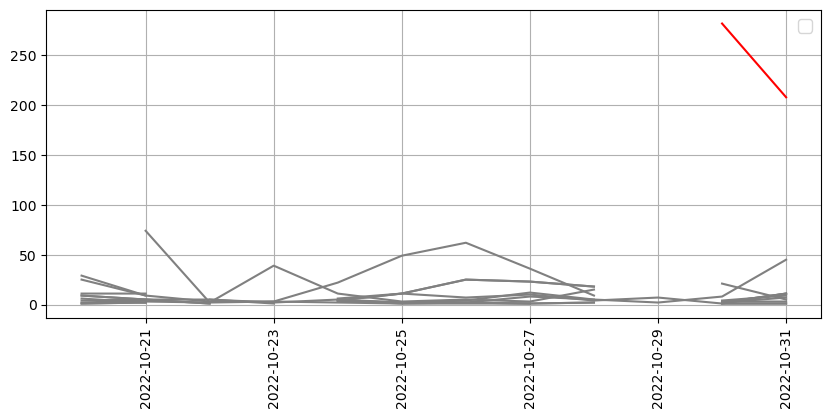

In [41]:
plt.figure(figsize=(10,4))
plt.plot(df_concat["day"], df_concat["전시회서 스마트공장"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["외교부와 유니세프"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["한류국제학술대회 서울"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["중국 중앙선전부장이"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["전시회서 스마트공장"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["대표이사가 업무협약서를"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["휴대전화 러시아"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["한국동서발전 사업부사장과"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["레바논 대통령은"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["이탈리아 유격대원들에게"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["억원작년 동기_y"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["김태종 특파원"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["대한민국시도의회"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["김태종 특파원"], "-", color='grey')
plt.plot(df_concat["day"], df_concat["핼러윈"], "-", color='red')
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
# plt.yscale('logit')
# plt.axis((0,2,0,4))
plt.show()